# Machine Learning Engineer Nanodegree final project 


## Project: Heart Disease Detection 

In [40]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualization code visuals.py
# import visuals as vs
import matplotlib.pyplot as plt
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("heart.csv")

# Success - Display the first record
display(data.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Dictionary

* age : age in years 


* sex : (1 = male; 0 = female) 


* cp : chest pain type 


* trestbps : resting blood pressure (in mm Hg on admission to the hospital) 


* chol : serum cholestoral in mg/dl 


* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 


* restecg : resting electrocardiographic results 


* thalach : maximum heart rate achieved 


* exang : exercise induced angina (1 = yes; 0 = no) 


* oldpeak : ST depression induced by exercise relative to rest 


* slope : the slope of the peak exercise ST segment 


* ca : number of major vessels (0-3) colored by flourosopy 


* thal : 3 = normal; 6 = fixed defect; 7 = reversable defect 


* target : have disease or not (1=yes, 0=no)

In [41]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [42]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [58]:
data.isnull().values.any()

False

## Preparing the Data

### one-hot encode

In [54]:
# Split the data into features and target label
target = data['target']
features = data.drop('target', axis = 1)

encoded = list(data.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

print (encoded)

14 total features after one-hot encoding.
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [55]:
a = pd.get_dummies(features['cp'], prefix = "cp")

b = pd.get_dummies(features['thal'], prefix = "thal")

c = pd.get_dummies(features['slope'], prefix = "slope")

frames = [features, a, b, c]

features = pd.concat(frames, axis = 1)

features = features.drop(['cp', 'thal', 'slope'] , axis = 1)

features.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


### Shuffle and Split Data

In [27]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 242 samples.
Testing set has 61 samples.


## Evaluating Model Performance
Diagnostic tests are often used with sensitivity as the headline metrics.

>Sensitivity is the proportion of truly diseased persons in the screened population who are identified as diseased by the screening test (i.e. they have high scores). Sensitivity indicates the probability that the test will correctly diagnose a case, or the probability that any given case will be identified by the test.

so we will be using the same metrice (sensitivity) aka Recall.

In [28]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score,precision_score



## Supervised Learning Models


In [29]:
def train_predict(X, y , learner , params):
      
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
   
    scoring_fnc = make_scorer(accuracy_score)

    grid = GridSearchCV(learner, params, scoring = scoring_fnc, cv=cv_sets)

    grid = grid.fit(X, y)

    return grid.best_estimator_

### K-Nearest Neighbors (KNeighbors)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


knn = KNeighborsClassifier()

knn_params = {'n_neighbors':[i for i in range(1,30,2)]}

knn_model = train_predict(X_train , y_train , knn , knn_params)

knn_pred = knn_model.predict(X_test)


print('Using K-NN we get an accuracy score of: ',
     round(accuracy_score(y_test,knn_pred),5)*100,'%')

print('Recall Score: ',recall_score(y_test , knn_pred))

print('Using k-NN we get a recall score of: ',
      round(recall_score(y_test,knn_pred),5)*100,'%')

Using K-NN we get an accuracy score of:  70.492 %
Recall Score:  0.705882352941
Using k-NN we get a recall score of:  70.588 %


### Support Vector Machine (SVM)

In [44]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
                        

svm_params = {'gamma' : [0.001, 0.01, 0.1, 1],'C':[0.001, 0.01, 0.1]}

svm_model = train_predict(X_train , y_train , svm , svm_params)

svm_pred = svm_model.predict(X_test)



print('Accuracy Score: ',accuracy_score(y_test , svm_pred))

print('Using SVM we get an accuracy score of: ',
      round(accuracy_score(y_test,svm_pred),5)*100,'%')

print('Recall Score: ',recall_score(y_test , svm_pred))

print('Using SVM we get a recall score of: ',
      round(recall_score(y_test,svm_pred),5)*100,'%')

Accuracy Score:  0.639344262295
Using SVM we get an accuracy score of:  63.934 %
Recall Score:  0.970588235294
Using SVM we get a recall score of:  97.059 %


### GaussianNB

In [32]:

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)

print('Accuracy Score: ',accuracy_score(y_test , y_pred))

print('Using GaussianNB we get an accuracy score of: ',
      round(accuracy_score(y_test,y_pred),5)*100,'%')

print('Recall Score: ',recall_score(y_test , y_pred))

print('Using GaussianNB we get a recall score of: ',
      round(recall_score(y_test,y_pred),5)*100,'%')

Accuracy Score:  0.868852459016
Using GaussianNB we get an accuracy score of:  86.885 %
Recall Score:  0.882352941176
Using GaussianNB we get a recall score of:  88.235 %


### Decision Tree Algorithm

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt_params = {'max_depth':[2,4,6,8],'min_samples_leaf':[2,4,6,8], 'min_samples_split':[2,4,6,8]}

dt_model = train_predict(X_train , y_train , dt , dt_params)

dt_pred = dt_model.predict(X_test)

print('Accuracy Score: ',accuracy_score(y_test , dt_pred))

print('Using Decision Tree we get an accuracy score of: ',
      round(accuracy_score(y_test,dt_pred),5)*100,'%')

print('Recall Score: ',recall_score(y_test , dt_pred))

print('Using Decision Tree we get a recall score of: ',
      round(recall_score(y_test,y_pred),5)*100,'%')

Accuracy Score:  0.83606557377
Using Decision Tree we get an accuracy score of:  83.607 %
Recall Score:  0.882352941176
Using Decision Tree we get a recall score of:  88.235 %


## Comparing models

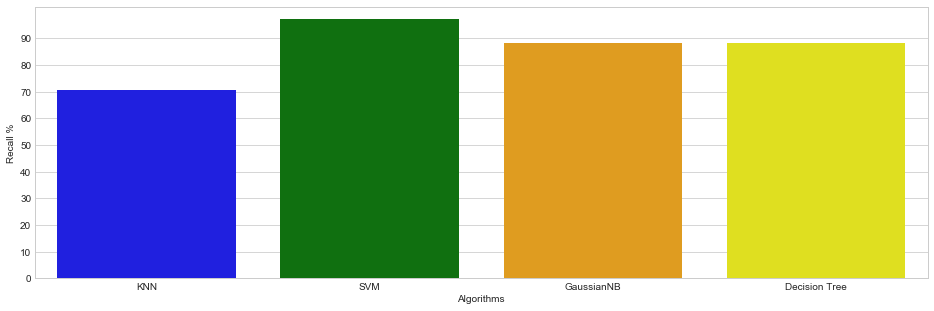

In [60]:
models = ["KNN", "SVM", "GaussianNB", "Decision Tree"]
recall = [70.588, 97.059, 88.235, 88.235 ]
colors = ["blue", "green", "orange", "yellow"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Recall %")
plt.xlabel("Algorithms")
sns.barplot(x = models, y = recall, palette = colors)
plt.show()

#### SVM has the highest recall score. But it also has low accuracy (compared to the other models).
#### GaussianNB and Decision Tree both come in second. with almost the same results for both Recall and Accuracy.
#### KNN has the worst results when it comes to Recall. still it scores around 70% which is higher than some of the used tests for detecting heart disease.